In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date, datetime

start_year = 2005      # Année de début de période d'étude
end_year   = 2021      # Année de fin de période d'étude   
chk        = False     # Affichage de log des checks
sampled    = False     # Travail sur données samplées de df

df, dic_usagers, dic_caract, dic_lieux, dic_vehic = pt.get_work_df(start_year, end_year, sampled, chk)

In [2]:
display_stat_data_load = False

if display_stat_data_load:
    pt.display_stats_data_load(dic_usagers, dic_caract, dic_lieux, dic_vehic, start_year, end_year)

### Suppression des colonnes jugées non pertinentes (relatives à une info géographique trop fine)

In [3]:
cols_rmv = ['com', 'adr', 'lat', 'long', 'pr', 'pr1']
df = df.drop(columns=cols_rmv, axis=1)

### Représentation graphique des *Null* - Suppression de variables avec plus de 8 % de Null

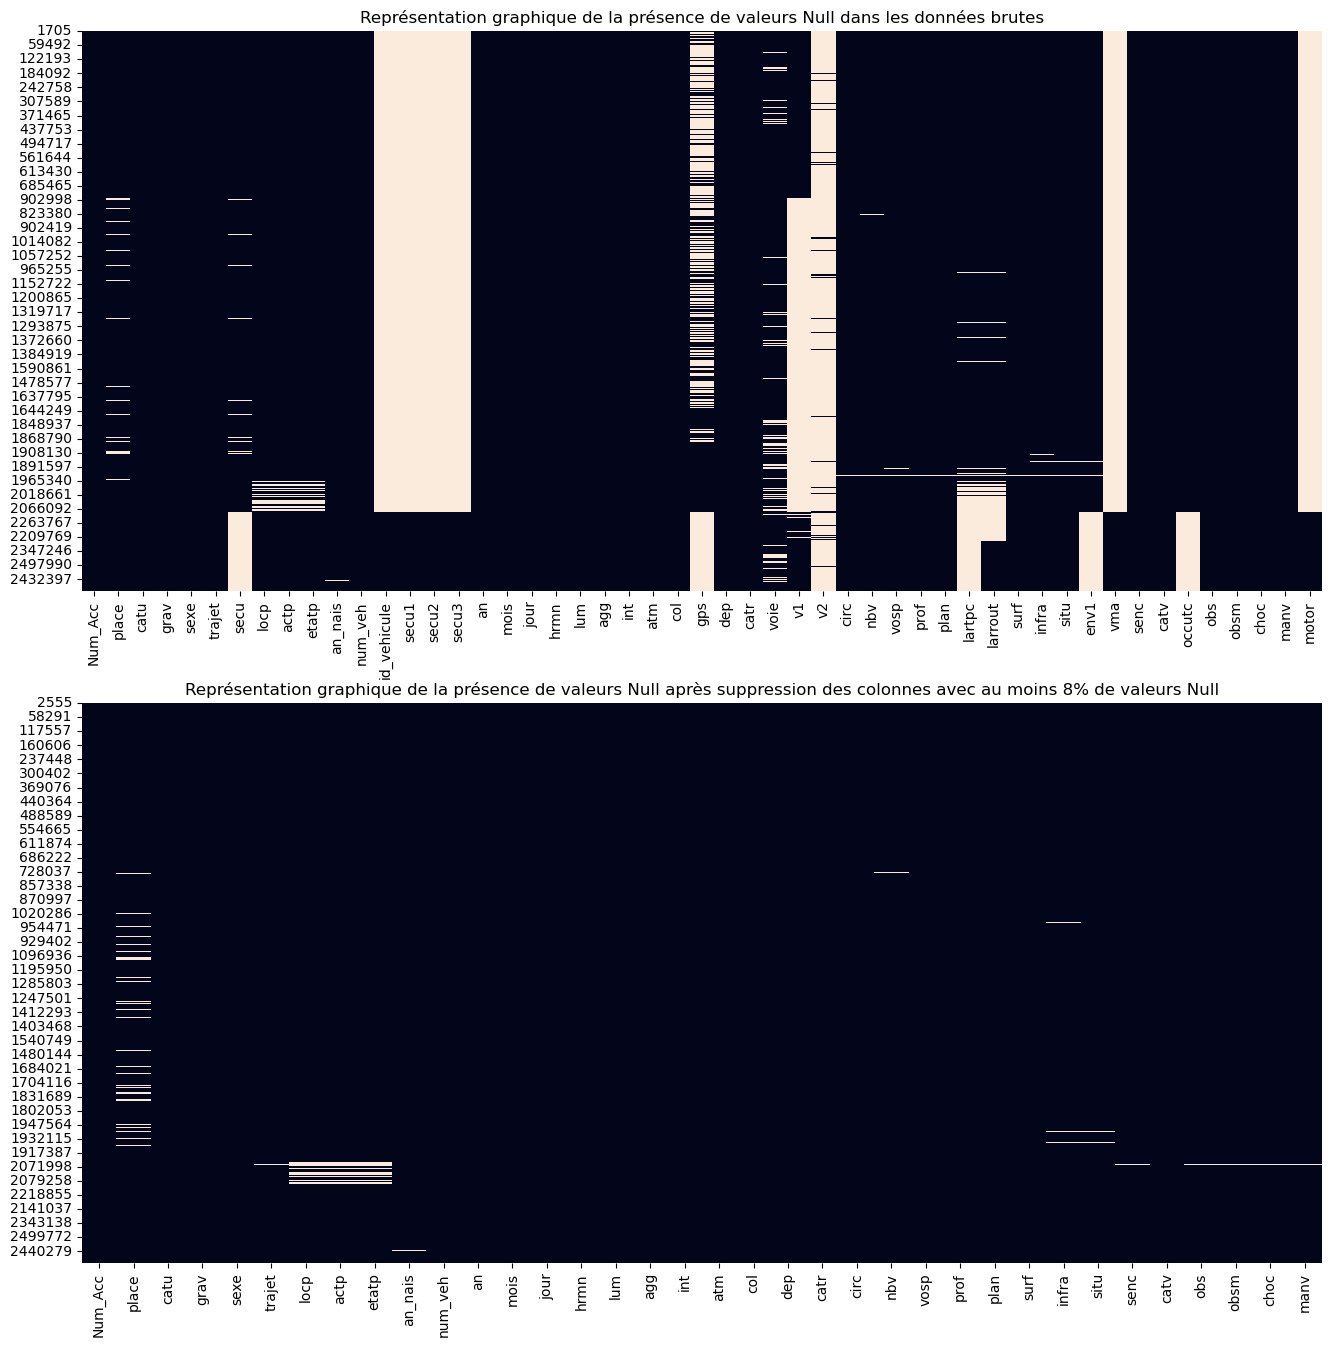

In [4]:
df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

fig, ax = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(16, 16)
ax[0].set_title('Représentation graphique de la présence de valeurs Null dans les données brutes')
sns.heatmap(df_sample.isna(), cbar=False, ax=ax[0]);

df = pt.rmv_col_too_much_null(df, 0.08, False)

df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

ax[1].set_title('Représentation graphique de la présence de valeurs Null après suppression des colonnes avec au moins 8% de valeurs Null')
sns.heatmap(df_sample.isna(), cbar=False, ax=ax[1]);

### Transformation des  *Null* restants en -1 (non renseigné) pour les colonnes qui l'autorisent

In [5]:
df = pt.clean_categ_not_specified(df)

### Nettoyage de l'année de naissance

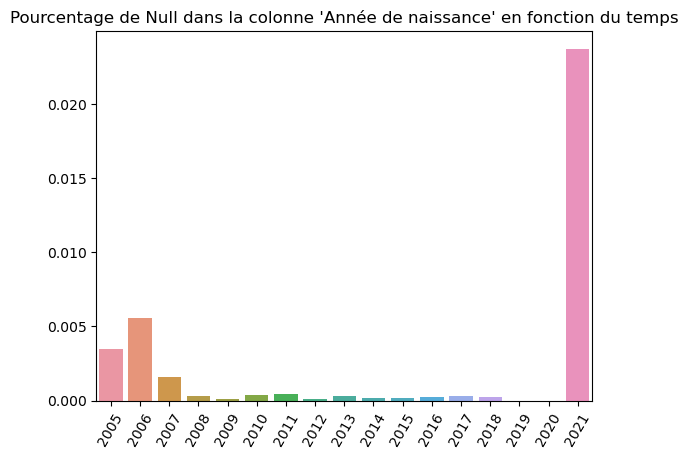

In [6]:
df[df.an_nais.isna()].shape[0]
df[df.an_nais.isna()].an.value_counts()

years = []
rate_nan = []
for year in range(start_year, end_year+1):
    years.append(year)
    rate_nan.append(df[(df.an_nais.isna()) & (df.an==year)].shape[0] / df[df.an==year].shape[0])

plt.title(f"Pourcentage de Null dans la colonne 'Année de naissance' en fonction du temps")
ax = sns.barplot(x=years, y=rate_nan)
plt.xticks(rotation=60);

In [7]:
print("Suppression des lignes avec Null : ")
nb_bef = df.shape[0]
print(f"Nombre de lignes avant : {nb_bef}")

df = df.dropna(axis = 0, how = 'any')
nb_aft = df.shape[0]
print(f"Nombre de lignes après : {nb_aft}")
print(f"Taux de perte : {(nb_bef-nb_aft)/nb_aft*100:.2f} %")

Suppression des lignes avec Null : 
Nombre de lignes avant : 2506762
Nombre de lignes après : 2501286
Taux de perte : 0.22 %


### Nettoyage de la colonne *dep* (code département)

In [8]:
df = pt.clean_col_dep(df, False)

### Création de *age*

In [9]:
df = pt.create_col_age(df)

### Affichage des modes des variables catégorielles restantes

In [10]:
var_categ = df.select_dtypes('Int64').columns
col_excluded = ['Num_Acc']

for col in var_categ:
    if not (col in col_excluded):
        modes = list(df[col].unique())
        print(f"{col}\t: {modes}")            

place	: [1, 2, 4, 5, 3, 0, 8, 9, 7, 6, -1, 10]
catu	: [1, 2, 3, 4]
grav	: [4, 3, 1, 2]
sexe	: [1, 2, -1]
trajet	: [1, 3, 0, 5, 9, 4, 2, -1]
locp	: [0, 2, 4, 1, 5, 6, 3, 8, 7, -1, 9]
etatp	: [0, 2, 1, 3, -1]
an_nais	: [1976, 1968, 1964, 2004, 1998, 1991, 1955, 1979, 1983, 1956, 1920, 1923, 1972, 1949, 1990, 1951, 1965, 1978, 1966, 1925, 1926, 1950, 1962, 1974, 1986, 1984, 1971, 1985, 1987, 1936, 1938, 1980, 1957, 1960, 1952, 1963, 1989, 1953, 1935, 1973, 1942, 1958, 1970, 1947, 1969, 1982, 1988, 1937, 1933, 1959, 1939, 1977, 1948, 1946, 1993, 1943, 1940, 1981, 1997, 1934, 1961, 1995, 1975, 1954, 1932, 2000, 1967, 1928, 1945, 1941, 1999, 2001, 1931, 1994, 1915, 1917, 1919, 1921, 1929, 2003, 1927, 1944, 1922, 1924, 1916, 1930, 1992, 1918, 2002, 2005, 1996, 1914, 1913, 1901, 1909, 1912, 1898, 1911, 1906, 1910, 1900, 1905, 1902, 1897, 1907, 1896, 1908, 1903, 1904, 1899, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
an	: [2005, 2006, 2007, 20

###  Création de *date* - *joursem* - *grav_lbl*

In [11]:
df = pt.create_col_date(df)
df = pt.create_col_joursem(df)
df = pt.create_col_grav_lbl(df)

In [12]:
df.an

0          2005
1          2005
2          2005
3          2005
4          2005
           ... 
2506757    2021
2506758    2021
2506759    2021
2506760    2021
2506761    2021
Name: an, Length: 2501286, dtype: Int64

### Suppresion des collones inutiles : *an_nais*

In [13]:
df = df.drop(columns=['an_nais'], axis=1)

### hrmn


In [14]:
# def format_hour(s):
#     if len(s) == 4:
#         hr = s[0:2] if len(s[0:2]) == 2 else f"0{s[0:2]}"
#         mn = s[3:4] if len(s[3:4]) == 2 else f"0{s[3:4]}"
#         return datetime.strptime(f"{hr}:{mn}", "%H:%M").time() 

# # Suppression des lignes avec heure = None
# df['heure'] = [format_hour(str(h)) for h in df.hrmn]
# df = df.drop(columns=['hrmn'], axis=1)

# df[df['heure'] == None]

# df = df.drop(df[df['heure'] == None].index)

# df['heure'].unique()
# stats_heure = df['heure'].value_counts()
# type(stats_heure)
# ax = sns.histplot(stats_heure, bins=300)
# ax.set_xlim(0,500)

# sns.histplot(df.heure);
# plt.hist(df.heure)

In [15]:
if False:
    colormap = 'tab20c'
    df_cross = pd.crosstab(df['joursem'], df['grav_lbl'], normalize='index')
    print(df_cross)

    sns.set_theme(style="ticks")
    f, ax = plt.subplots(figsize=(7, 5))
    chart = df_cross.plot(kind="bar", stacked=True, rot=0, ax=ax, 
                          title="Distribution de la gravité en fonction du jour de la semaine", colormap=colormap)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=80)
    sns.move_legend(ax, "upper right")

In [16]:
# df.nbv.value_counts(normalize=True) # On ne garde que <= 6, le reste ne représente que 0.7%
# df[df.nbv > 6].shape[0]/df.shape[0]

# df.surf.value_counts(normalize=True) # Transformer les 0 en -1

# df.catv.value_counts(normalize=True) # on ne garde que 7:VL, 33:Moto>125cm3, 10:VU, 2:Cyclo<50cm3, 30:Scooter<50cm3

# df.obs.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

# df.obsm.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

# df.choc.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

# df.manv.value_counts(normalize=True) # à supprimer, variable difficile à intégrer dans un modèle, connue qu'a posteriori

# print(df[df.grav==2].obs.value_counts(normalize=True).head())
# print(df[df.grav!=2].obs.value_counts(normalize=True).head())



### Analyse intercorrelations between variables

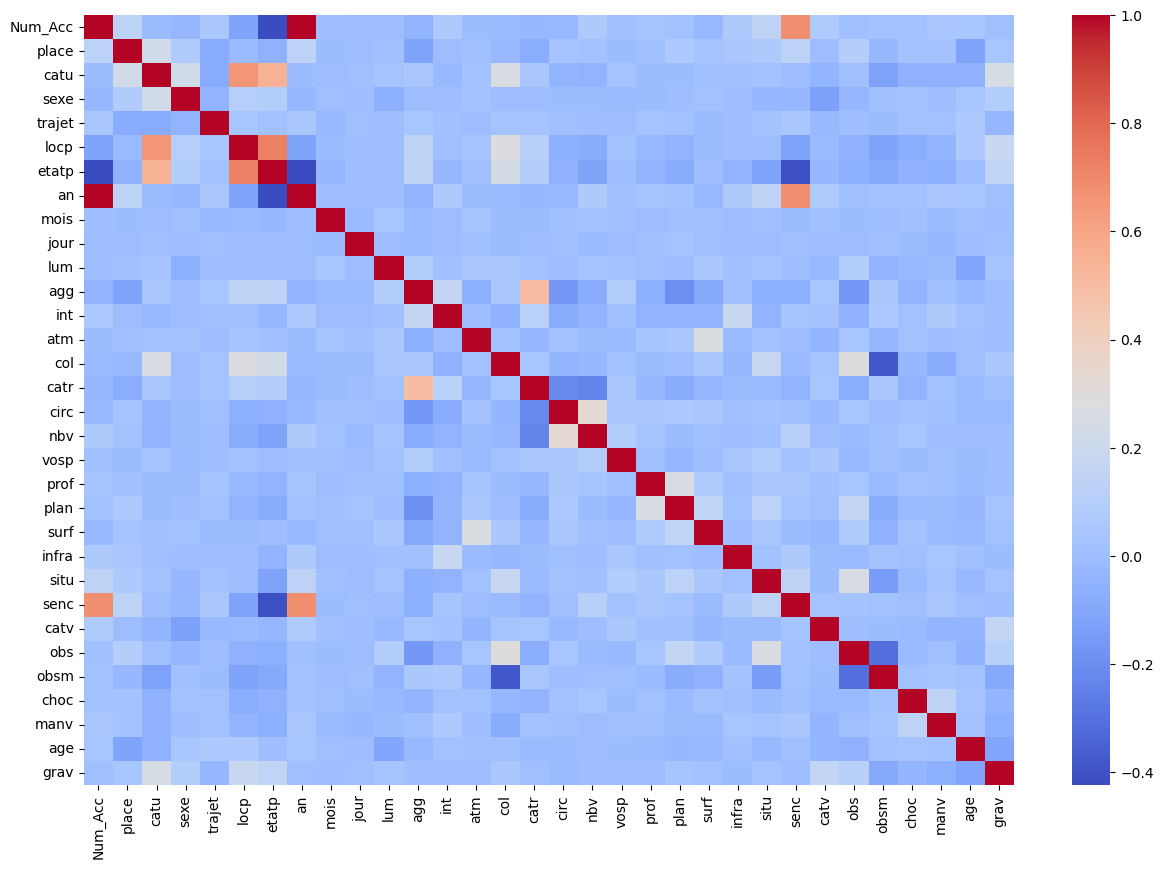

In [17]:
if True:
    target = df['grav']
    data = df.drop(columns=['grav'], axis=1)
    # set 'grav' as last column of data
    data['grav'] = target

    data_sample = data.sample(10000)
    corr = data_sample.corr()

    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=False, cmap='coolwarm');    

### Evolution de gravité *Blessé hospitalisé* en 2019?

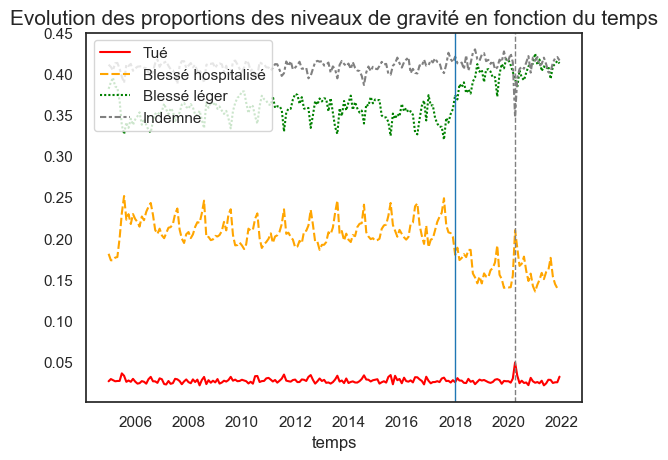

In [23]:
tue     = []
bless_l = []
bless_h = []
indemne = []
y_m     = []
years   = range(start_year, end_year+1)
months  = range(1, 13)

import datetime

for year in years:
    for month in months:
#         df_tmp = df[(df.date >= f'{year}-{month}-01') & (df.date <= f'{year}-{month+1}-1')]          
        df_tmp = df[(df.an==year) & (df.mois==month)]
        tue.append(df_tmp.grav.value_counts(normalize=True)[2])
        bless_h.append(df_tmp.grav.value_counts(normalize=True)[3])
        bless_l.append(df_tmp.grav.value_counts(normalize=True)[4])
        indemne.append(df_tmp.grav.value_counts(normalize=True)[1])
        y_m.append(datetime.datetime(year, month, 1))

  
data = pd.DataFrame({'Tué':tue, 'Blessé hospitalisé':bless_h, 'Blessé léger':bless_l, 'Indemne':indemne, 'temps':y_m})
data = data.set_index('temps')

sns.set_theme(style="white", palette=None)
ax = sns.lineplot(data=data, palette=['red','orange','green','gray']) #.set_title("Evolution des proportions des niveaux de gravité en fonction du temps")
ax.axes.set_title("Evolution des proportions des niveaux de gravité en fonction du temps",fontsize=15)

plt.axvline(datetime.datetime(2018, 1, 1), linewidth=1)
plt.axvline(datetime.datetime(2020, 4, 1), linestyle='--', color='gray', linewidth=1)
plt.legend(loc='upper left');

In [19]:
df.columns

Index(['Num_Acc', 'place', 'catu', 'grav', 'sexe', 'trajet', 'locp', 'actp',
       'etatp', 'num_veh', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int',
       'atm', 'col', 'dep', 'catr', 'circ', 'nbv', 'vosp', 'prof', 'plan',
       'surf', 'infra', 'situ', 'senc', 'catv', 'obs', 'obsm', 'choc', 'manv',
       'age', 'date', 'joursem', 'grav_lbl'],
      dtype='object')

In [20]:
df.an

0          2005
1          2005
2          2005
3          2005
4          2005
           ... 
2506757    2021
2506758    2021
2506759    2021
2506760    2021
2506761    2021
Name: an, Length: 2501286, dtype: Int64

In [21]:
# vc = df.joursem.value_counts()
# xlabels = ['lundi', 'mardi', 'mercredi', 'jeudi', 'vendredi', 'samedi', 'dimanche']
# heights = [vc[label] for label in xlabels]

# plt.bar(x=xlabels, height=heights)